# Exploratory  Data Analysis of 1.6 Million traffic accidents in London.
## The data is obtained from Kaggle. Data is comprised in three different files.
### Due to the constraints of machine's ability, some deeep analytics have been subsetted only to a minor fraction of data albeit , an important one.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [143]:
# graphing and visualization
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap
import networkx as nx
import heapq 

In [144]:
# Importing datasets
df_one = pd.read_csv("C:/Users/amarchendra/Downloads/datasets/england_traffic/accidents_2005_to_2007.csv/accidents_2005_to_2007.csv")
df_two = pd.read_csv("C:/Users/amarchendra/Downloads/datasets/england_traffic/accidents_2009_to_2011.csv/accidents_2009_to_2011.csv")
df_three = pd.read_csv("C:/Users/amarchendra/Downloads/datasets/england_traffic/accidents_2012_to_2014.csv/accidents_2012_to_2014.csv")

In [145]:
df_one.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [146]:
# Merging all the datasets was simple because, there of homogenity in the column labels.
accident =pd.concat([df_one, df_two,df_three], axis=0)

In [147]:
# Apparently English use, OSGR for their co-ordinate data, we don't need here, some kind soul has already compiled latitude and 
# longitudinal data.
accident = accident.drop(['Location_Easting_OSGR','Location_Northing_OSGR'],axis=1)

In [148]:
# For the data available, the maximum number casualites of any year is tabulated.
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

year_wise_casualties = accident.groupby(['Year'])['Number_of_Casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties = year_wise_casualties.style.apply(highlight_max, axis=0)
year_wise_casualties

,Year,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
3,2009,222146
4,2010,208648
5,2011,203950
6,2012,241954
7,2013,183670
8,2014,194477


## Finding out the day of the week to be on the road travelling.! Unsurprisingly Saturday and Friday are the worst days to travel!

In [149]:
cas_table = accident.groupby(['Day_of_Week']).agg({'Number_of_Casualties':['sum'],'Speed_limit':['min','max']})
cas_table = cas_table.sort_values([('Number_of_Casualties','sum')],ascending=False)
cas_table = cas_table.reset_index()
cas_table.style.apply(highlight_max)

# Most dangerous days to travel.

In [150]:
date_wise_casualities = accident.groupby(['Date'])['Date','Number_of_Casualties'].sum()
worst_accident_days = date_wise_casualities.sort_values(by='Number_of_Casualties',ascending=False)
w_20_days = worst_accident_days.head(20)
w_20_days=w_20_days.reset_index()
w_20_days['Date'] = w_20_days.astype({'Date':'str'})

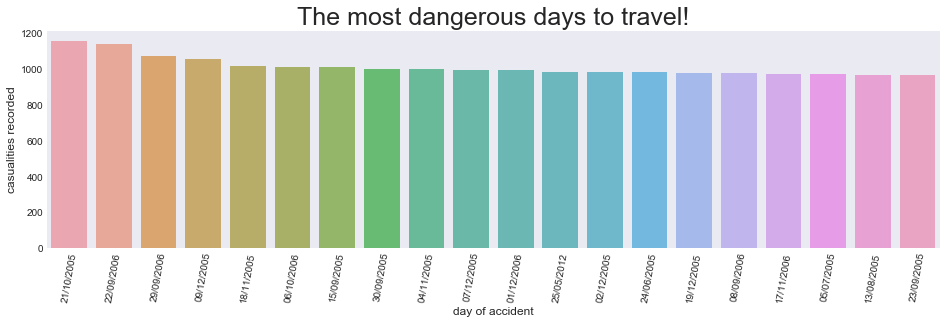

In [151]:
plt.figure(figsize=(16,4))
ax = sns.barplot(w_20_days['Date'], w_20_days['Number_of_Casualties'], alpha=0.8)
plt.title("The most dangerous days to travel!",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('casualities recorded', fontsize=12)
plt.xlabel('day of accident', fontsize=12)

plt.show()

### What is the spread of different kinds of accidents across the nation!?

In [152]:
level3 = accident[accident['Accident_Severity'] == 3]
level2 = accident[accident['Accident_Severity'] == 2]
level1 = accident[accident['Accident_Severity'] == 1]

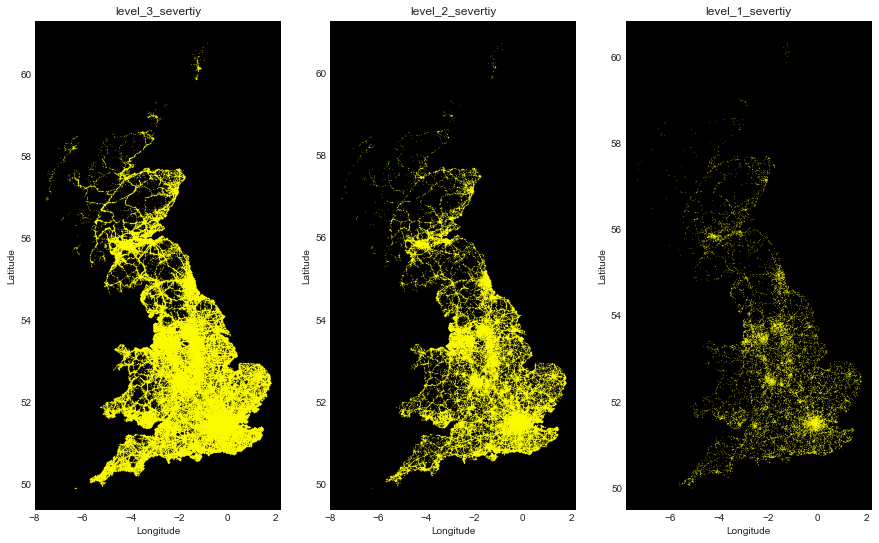

In [153]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,9))

## level 3 plot
level3.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("level_3_severtiy")
ax1.set_facecolor('black')

## level 2 plot
level2.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("level_2_severtiy")
ax2.set_facecolor('black')

# level 1 plot

level1.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("level_1_severtiy")
ax3.set_facecolor('black')




f.show()

# It looks like, regardless of the severity, a lot of accidents are concentrated around the same area.

In [154]:
# Identifying the worst districts to travel.
area_wise = accident.groupby(['Local_Authority_(District)'])['Number_of_Casualties'].size()
area_wise = area_wise.sort_values(ascending=False)
area_wise = area_wise.reset_index()
area_wise = area_wise.head(10).style
area_wise

,Local_Authority_(District),Number_of_Casualties
0,300,27675
1,204,19984
2,102,14999
3,91,14068
4,1,13644
5,200,13569
6,926,13355
7,215,12522
8,923,11314
9,601,10753


## The highway to hell: 

In [155]:
highway_to_hell = accident[accident['Local_Authority_(District)'] == 300]['Local_Authority_(Highway)'].unique()
print("London's most dangerous highway is {}".format(highway_to_hell))      

London's most dangerous highway is ['E08000025']


## Watching the accidents happening live!!

In [156]:
axe = accident[accident['Day_of_Week'] == 6]
axe = axe[axe['Local_Authority_(District)'] == 300]
axe = axe[axe['Year'] == 2005] # df of year 2005 , with loc_dist 300 and saturday.
axe.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
77241,200520D013903,-1.856415,52.476672,20,3,1,2,07/01/2005,6,10:40,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01009198,2005
77252,200520D016603,-1.767518,52.470597,20,3,2,1,14/01/2005,6,10:00,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01009321,2005
77255,200520D017502,-1.798960,52.516414,20,3,1,2,14/01/2005,6,12:20,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01009101,2005
77256,200520D018401,-1.895641,52.512584,20,3,2,1,14/01/2005,6,12:45,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01009051,2005
77260,200520D020001,-1.882302,52.486410,20,3,3,1,14/01/2005,6,07:50,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01009191,2005


In [157]:
data=[]

csts=list(axe['Number_of_Casualties'].unique())
for row in csts:
    subset=axe[axe['Number_of_Casualties']==row]
    data.append(subset[['Latitude','Longitude']].values.tolist())

    
lat = 52.476672
lon = -1.856415
zoom_start=11
print("Saturday in the Year 2005")

# lat and lon varaibles , is where the animation begins.
m = folium.Map(location=[lat, lon], tiles="Cartodb dark_matter", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=10,max_speed=0.1)
hm.add_to(m)
m

Saturday in the Year 2005


In [158]:
# Visualizing the network patterns involved in the accidents.
net = axe[['Accident_Index','Local_Authority_(Highway)','Time']]
net.columns=['source','level_1','target']


In [159]:
graph=nx.from_pandas_edgelist(net)
print(nx.info(graph))
print('Density of graph:{}  '.format(nx.density(graph)))

Name: 
Type: Graph
Number of nodes: 1003
Number of edges: 639
Average degree:   1.2742
Density of graph:0.0012716341991988107  


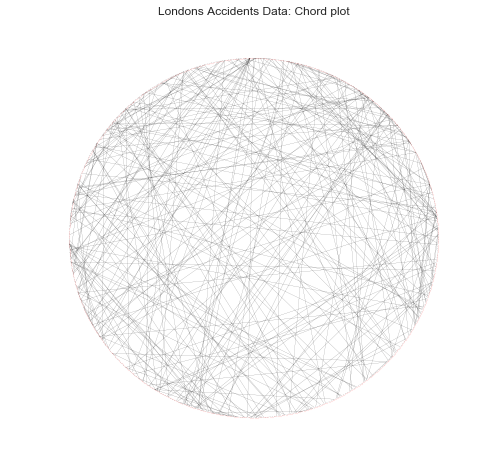

In [160]:
plt.figure(figsize=(8,8))
plt.title("Londons Accidents Data: Chord plot")
nx.draw_circular(graph,node_size=0.001, width=0.1)

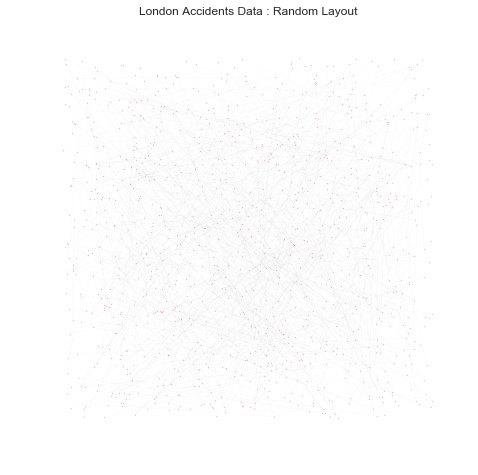

In [161]:
plt.figure(figsize=(8,8))
plt.title("London Accidents Data : Random Layout")
nx.draw_random(graph,node_size=0.01, width=0.01)

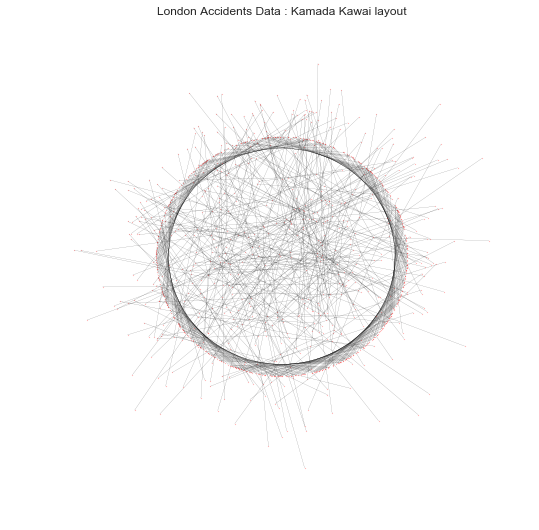

In [162]:
plt.figure(figsize=(9,9))
plt.title("London Accidents Data : Kamada Kawai layout")
nx.draw_kamada_kawai(graph,node_size=0.01, width=0.1)